In [2]:
# EJEMPLO 2: (presentacion Ejemplos intervalos de confianza en la toma de decisiones)

# Durante cinco años se llevó a cabo un estudio para determinar si existe alguna
# diferencia en el número de resfriados que sufren los fumadores y los no
# fumadores. A lo largo de los cinco años, se registraron los siguientes datos:

import numpy as np
import pandas as pd
import scipy.stats as st

# Los datos recopilados se muestran a continuacion:

no_fumadores = pd.Series([1, 0, 2, 7, 3, 1, 2, 2, 4, 3])
fumadores = pd.Series([4, 2, 6, 5, 8, 10, 8, 7])

# Es claro que los arreglos tienen diferente longitud, por lo que necesariamente se trata de muestras INDEPENDIENTES,
# esto es, se eligieron del salon N204 a 8 fumadores al azar y del salon N405 a 10 no fumadores, por ejemplo.

# Con la finalidad de que nuestros intervalos sean "estadisticamente correctos" y con ellos pueda tomar decisiones,
# verifiquemos uno de los requisitos: NORMALIDAD en las distribuciones de los datos para NO FUMADORES y FUMADORES,
# respectivamente.

# Para verificar NORMALIDAD tenemos 3 herramientas:
# 1. Histograma o diagrama de barras, si la variable es continua o discreta, respectivamente
# 2. Graficas qqplot (que veremos en este tutorial)
# 3. Pruebas de hipotesis (que veremos en este tutorial).

--- 
### No fumadores

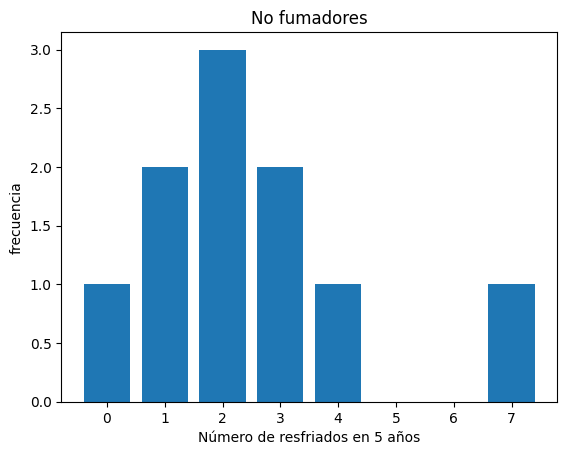

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
plt.bar(no_fumadores.unique(),no_fumadores.value_counts(sort=False))
# unique lo que hace es que muestra los valores sin repetir.
plt.xlabel('Número de resfriados en 5 años')
plt.ylabel('frecuencia')
plt.title('No fumadores')
plt.show()

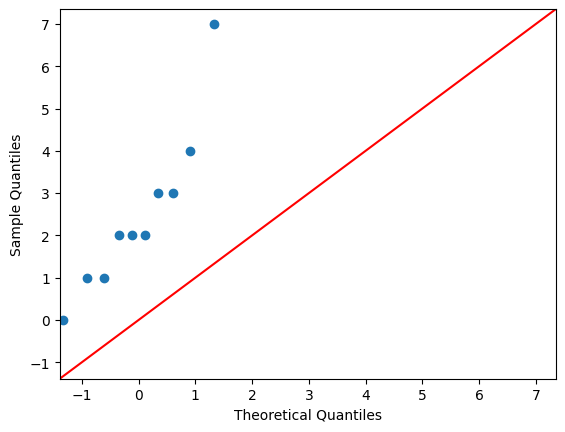

In [4]:
# Una grafica mejor
import statsmodels.api as sm
import pylab as py

sm.qqplot(no_fumadores, line='45')  # se pone 45° porque es la recta estandar
py.show()

In [5]:
# O una prueba de hipotesis
# Ho: normalidad
# Ha: no normalidad

# Regla de decision: si p-value es mayor o igual a mi
# alpha (probabilidad de equivocarme) entonces NO RECHAZO H0

from scipy.stats import anderson

phnorm_nofum = anderson(no_fumadores)
print(phnorm_nofum)

# Voy a copiar el resultado que muestra Python de la instrucción anterior:
# AndersonResult(statistic=0.47964914348705,
# critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]),
# significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# OJO: alfa=significance level y los muestra en porcentajes
# statistic=estadistico de prueba

# No reporta el p-value (uff!), entonces debemos tomar la decision comparando
# el valor del estadistico de prueba con los valores criticos.

# Entonces, para alfa=0.15, el valor critico es 0.501 y este es mayor al valor del
# estadistico que es 0.479. Asi que NO RECHAZO H0 por lo que los datos se distribuyen normal.

AndersonResult(statistic=0.47964914348705, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


> **NOTA**: Si te resulta complicado tomar la decision con la prueba de Anderson-Darling, existe otra prueba llamada Shapiro-Wilk (de hecho esta es mejor desde el punto de vista estadistico). Ambas pruebas sirven para verificar normalidad en la distribucion de los datos de la variable.

In [6]:
from scipy.stats import shapiro
phnorm_nofum2 = shapiro(no_fumadores)
print(phnorm_nofum2)

# Copio la respuesta:
# ShapiroResult(statistic=0.8942430019378662,
# pvalue=0.18919949233531952)

# Quiza sea mas facil porque sí nos da el pvalue. El criterio de decision es:
# si el pvalue es mayor o igual a alfa (probabilidad de equivocarme) entonces
# NO rechazo H0 y en consecuencia me "quedo con ella" y se concluye que
# los datos se distribuyen normalmente.
# Veamos lo que pasa en nuestro caso de "no fumadores". Si fijamos
# alfa=0.15 entonces como el pvalue es 0.1892, resulta ser mayor. Asi que
# los datos siguen una distribucion normal.

ShapiroResult(statistic=0.8942430019378662, pvalue=0.18919949233531952)


> **CONCLUSION**: el numero de resfriados para los NO FUMADORES sigue una distribucion normal, por lo que podemos usarla "con tranquilidad" para hacer inferencia estadistica: intervalos de confianza y pruebas de hipotesis.

---
### Fumadores

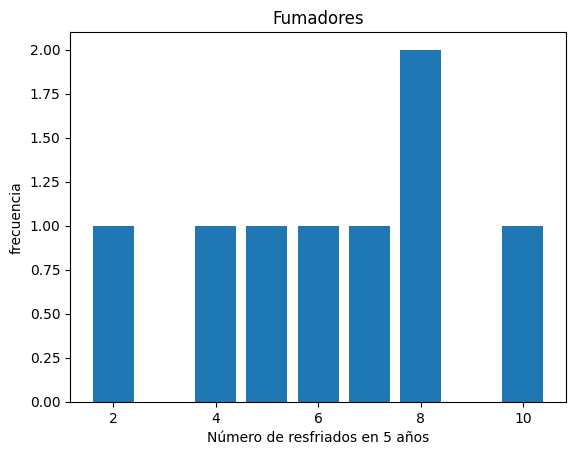

In [11]:
plt.figure()
plt.bar(fumadores.unique(),fumadores.value_counts(sort=False))
# unique lo que hace es que muestra los valores sin repetir.
plt.xlabel('Número de resfriados en 5 años')
plt.ylabel('frecuencia')
plt.title('Fumadores')
plt.show()

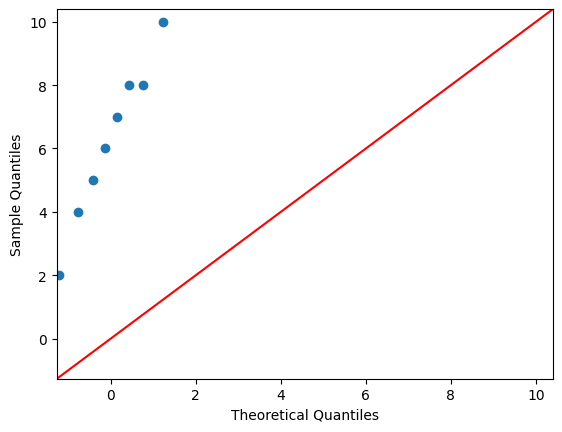

In [12]:
# La grafica de cuantiles qqplot discutida anteriormente

sm.qqplot(fumadores, line='45')  # se pone 45° porque es la recta estandar
py.show()

In [19]:
# O una prueba de hipotesis de Shapiro (ya vimos que esta sí nos da el pvalue)
# Ho: normalidad
# Ha: no normalidad

# Regla de decision: si p-value es mayor o igual a mi
# alpha (probabilidad de equivocarme) entonces NO RECHAZO H0

phnorm_fum2 = shapiro(fumadores)
print(phnorm_fum2)

# Copio la respuesta:
# ShapiroResult(statistic=0.9829189777374268,
# pvalue=0.9758837223052979)

# Nuevamente si consideramos a alfa=0.15, el pvalue lo supera (y por mucho).
# Podemos decir que la distribucion de los datos para los fumadores
# sigue una distribucion normal.

ShapiroResult(statistic=0.9829189777374268, pvalue=0.9758837223052979)
False


**CONCLUSION**: el numero de resfriados para los FUMADORES sigue una distribucion normal, por lo que podemos usarla "con tranquilidad" para hacer inferencia estadistica: intervalos de confianza y pruebas de hipotesis

---

Ahora a responder la pregunta inicial. ¿Existe alguna razón para creer que el fumar influye en la propensión a resfriarse?.
Considera una confianza del 95%.

Las comparaciones en Estadistica se hacen con promedios y con varianzas.
En el primer caso, solo mediante la diferencia entre ellas se llega al resultado
pedido.
En el segundo caso, mediante cocientes de varianzas.

ESAS SON LAS REGLAS.

SUPUESTOS:
1. normalidad en las variables involucradas (secciones anteriores)
2. varianzas poblacionales desconocidas e IGUALES
3. muestras INDEPENDIENTES

In [17]:
import pingouin as pg

ic = pg.ttest(fumadores, no_fumadores, paired=False, confidence=0.95)
print(ic.columns)  # checar nombres del objeto ic
print(ic["CI95%"])  # solo interesa el intervalo

# Resultado: T-test    [1.39, 6.11]

# El intervalo contiene solamente valores positivos, eso significa que
# (mu_fum)-(mu_nofum)>0, es decir mu_fum>mu_nofum y en consecuencia
# el promedio de resfriados en los fumadores es mayor que el promedio de resfriados
# en los no fumadores; en otras palabras significa que FUMAR perjudica!

Index(['T', 'dof', 'alternative', 'p-val', 'CI95%', 'cohen-d', 'BF10',
       'power'],
      dtype='object')
T-test    [1.39, 6.11]
Name: CI95%, dtype: object


In [18]:
# ¿Los grupos de personas son homogéneos, es decir, las varianzas del número de
# resfriados son iguales?: Comparacion de varianzas

# H0: varianzas iguales
# Ha: varianzas distintas

from scipy.stats import levene
stat, p_value = levene(fumadores, no_fumadores)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

# Criterio de decision: si pvalue es mayor o igual a alfa, NO RECHAZO H0
# y en consecuencia podemos pensar que las varianzas son iguales.

# P-value: 0.32712861863445375. Suponiendo un valor de alfa= 0.05 y como el
# pvalue es mayor, entonces NO rechazamos Ho y las varianzas son iguales.
# Significa que los dos grupos de personas son muy parecidos entre sí, por ejemplo,
# se dedican a las mismas actividades o son de la misma región geográfica, etc.

Lavene's test statistic: 1.021831215379602
P-value: 0.32712861863445375


---